# Bibliotecas

## Instalações

In [9]:

#!pip install -U scikit-learn
#!pip install seaborn
#!pip install nltk
!pip install wordcloud 

## Importações

In [82]:
import nltk
from nltk import tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_samples, silhouette_score, v_measure_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


# Análise Exploratória

In [2]:
licitacoes = pd.read_csv('C:\Gabriel\Pos\Classificação Licitômetro\TodasLicitacoes.csv',sep=';')

In [6]:
licitacoes.head(20)

,DsObjetoLicitacao
0,
1,...
2,Seleção e contratação de empresa de en...
3,ESTABILIZADOR DE TENSÃO 2.OOO VA
4,Para fornecer água para o setor de educação...
5,Para prestar serviços na paresentação do gr...
6,PRESTAÇÃO DE SERVIÇO NO FORNECIMENTO DE 14 ...
7,Serviço de reprografia preto e branco até a...
8,Solicitação para aquisição de materiais de ...
9,Solicitação para serviço de instalação dos ...


In [4]:
print(len(licitacoes))

1515582


# Tratamento de Dados

## Removendo StopWords

In [76]:
palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese")
frase_processada = list()
token_espaco = tokenize.WhitespaceTokenizer()

for opiniao in licitacoes["DsObjetoLicitacao"]:
    nova_frase = list()
    palavras_texto = token_espaco.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in palavras_irrelevantes:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
licitacoes["retirada_stop_words"] = frase_processada

In [77]:
licitacoes.sample(10)

,DsObjetoLicitacao,retirada_stop_words
1354589,Locação de imóvel localizado no Povoado de Ilh...,Locação imóvel localizado Povoado Ilha Camaleã...
1194788,"AQUISIÇÃO DE QUATRO CAIXA DE ISOPOR 165 LTS, P...","AQUISIÇÃO DE QUATRO CAIXA DE ISOPOR 165 LTS, P..."
241307,confeccao de portas,confeccao portas
1425426,Prestação de serviços na locação de uma CAÇAMB...,Prestação serviços locação CAÇAMBA placa polic...
1506310,VALOR EMPENHADO PARA ATENDER A DESPESA COM AQU...,VALOR EMPENHADO PARA ATENDER A DESPESA COM AQU...
459364,Contratação do Show Artístico de “Caviar com R...,Contratação Show Artístico “Caviar Rapadura” a...
660871,LOCAÇÃO DE IMÓVEL SITUADO NA RUA SÃO PAULO N. ...,LOCAÇÃO DE IMÓVEL SITUADO NA RUA SÃO PAULO N. ...
1393333,PRESTAÇÃO DE SERVIÇO COMO SERRALHEIRO EM RECUP...,PRESTAÇÃO DE SERVIÇO COMO SERRALHEIRO EM RECUP...
476169,AQUISIÇAO DE 1000 (HUM MIL) CÁPSULAS PARA CHIB...,AQUISIÇAO DE 1000 (HUM MIL) CÁPSULAS PARA CHIB...
1338639,FORNECIMENTO DE LANCHES PARA OS VACINADORES DA...,FORNECIMENTO DE LANCHES PARA OS VACINADORES DA...


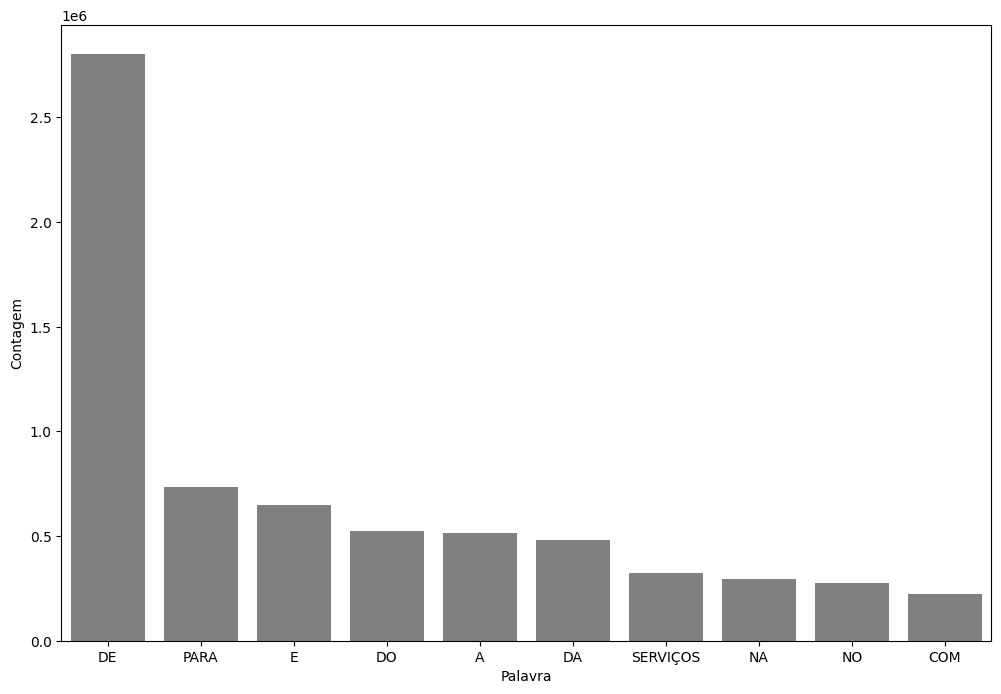

In [83]:
def pareto(texto, coluna_texto, quantidade):
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                 "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()   

pareto(licitacoes, "retirada_stop_words", 10)

### Removendo Pontuações

In [87]:
from string import punctuation
token_pontuacao = tokenize.WordPunctTokenizer()

pontuacao = list()
for ponto in punctuation:
    pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes

frase_processada = list()
for opiniao in licitacoes["retirada_stop_words"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in pontuacao_stopwords:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
licitacoes["removendo_pontuacoes"] = frase_processada

In [88]:
licitacoes.head()

,DsObjetoLicitacao,retirada_stop_words,removendo_pontuacoes
0,,,
1,...,CONTRATAÇÃO DE EMPRESA ESPECIALIZADA PARA O FO...,CONTRATAÇÃO DE EMPRESA ESPECIALIZADA PARA O FO...
2,Seleção e contratação de empresa de en...,Seleção contratação empresa engenharia execuçã...,Seleção contratação empresa engenharia execuçã...
3,ESTABILIZADOR DE TENSÃO 2.OOO VA,ESTABILIZADOR DE TENSÃO 2.OOO VA,ESTABILIZADOR DE TENSÃO 2 OOO VA
4,Para fornecer água para o setor de educação...,Para fornecer água setor educação municipal.,Para fornecer água setor educação municipal


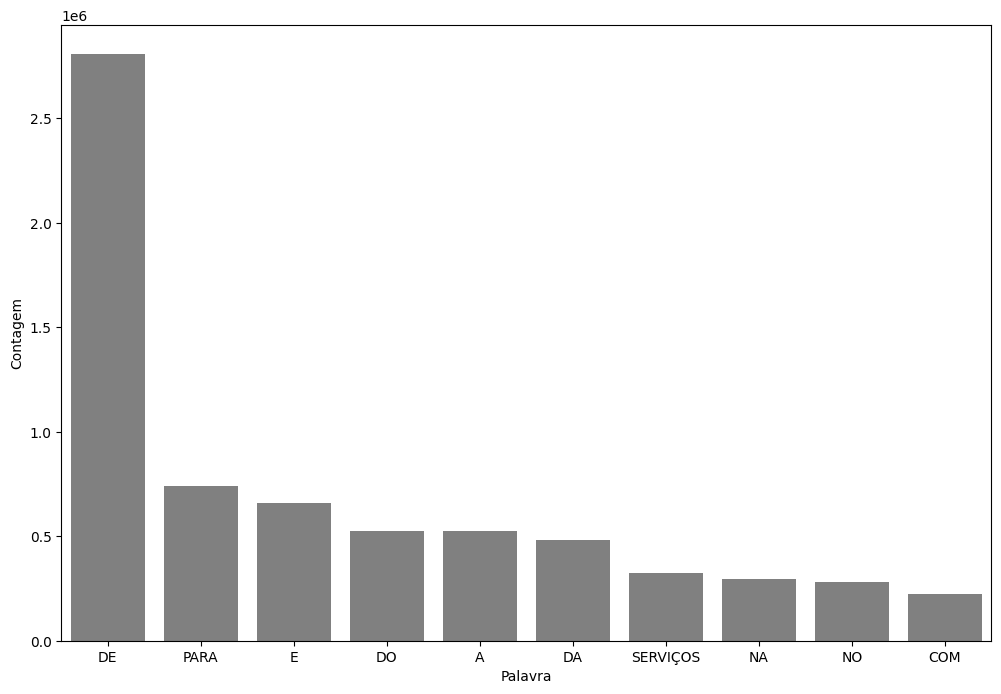

In [89]:
pareto(licitacoes, "removendo_pontuacoes", 10)

### Normalizando o Texto

In [91]:
import unidecode

In [93]:
sem_acentos = [unidecode.unidecode(texto) for texto in licitacoes["removendo_pontuacoes"]]
sem_acentos[0]

''

In [94]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [95]:
stopwords_sem_acento

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~',
 'a',
 'a',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'as',
 'ate',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'e',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'eramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'esta',
 'estamos',
 'estao',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estavamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estiveramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivessemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'foramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fossemos',
 'fui',
 'ha',
 'haja

In [97]:
licitacoes["removendo_acentos"] = sem_acentos

frase_processada = list()
for opiniao in licitacoes["removendo_acentos"]:
    nova_frase = list()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
licitacoes["removendo_acentos"] = frase_processada

In [98]:
licitacoes.head()

,DsObjetoLicitacao,retirada_stop_words,removendo_pontuacoes,removendo_acentos
0,,,,
1,...,CONTRATAÇÃO DE EMPRESA ESPECIALIZADA PARA O FO...,CONTRATAÇÃO DE EMPRESA ESPECIALIZADA PARA O FO...,CONTRATACAO DE EMPRESA ESPECIALIZADA PARA O FO...
2,Seleção e contratação de empresa de en...,Seleção contratação empresa engenharia execuçã...,Seleção contratação empresa engenharia execuçã...,Selecao contratacao empresa engenharia execuca...
3,ESTABILIZADOR DE TENSÃO 2.OOO VA,ESTABILIZADOR DE TENSÃO 2.OOO VA,ESTABILIZADOR DE TENSÃO 2 OOO VA,ESTABILIZADOR DE TENSAO 2 OOO VA
4,Para fornecer água para o setor de educação...,Para fornecer água setor educação municipal.,Para fornecer água setor educação municipal,Para fornecer agua setor educacao municipal


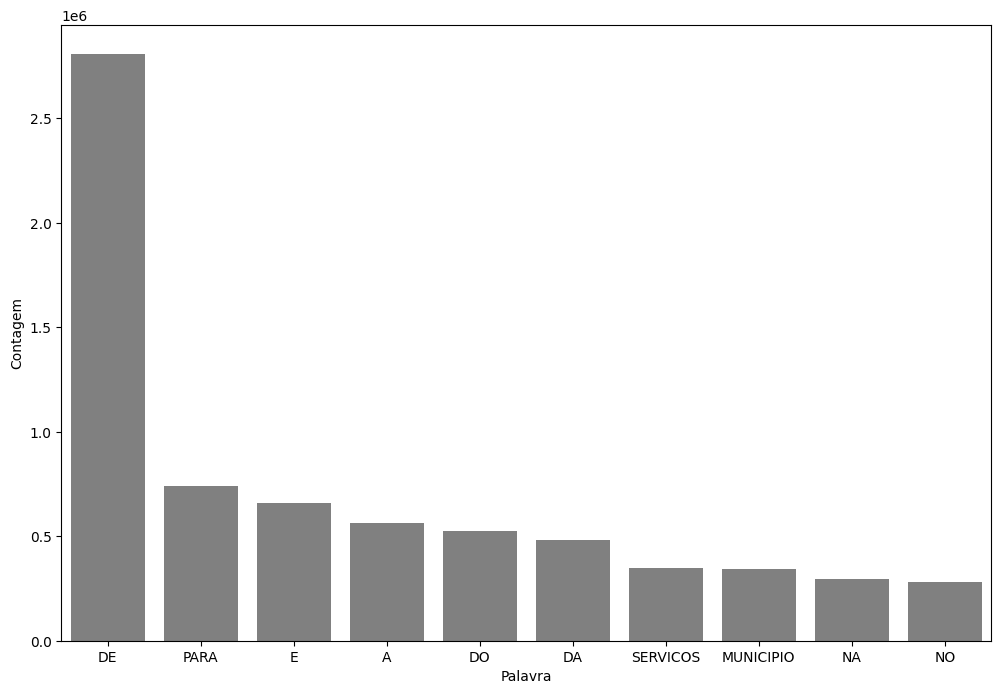

In [99]:
pareto(licitacoes, "removendo_acentos", 10)

In [100]:
frase_processada = list()
for opiniao in licitacoes["removendo_acentos"]:
    nova_frase = list()
    opiniao = opiniao.lower()
    palavras_texto = token_pontuacao.tokenize(opiniao)
    for palavra in palavras_texto:
        if palavra not in stopwords_sem_acento:
            nova_frase.append(palavra)
    frase_processada.append(' '.join(nova_frase))
    
licitacoes["tratamento_4"] = frase_processada

In [103]:
licitacoes["tratamento_4"][1]

'contratacao empresa especializada fornecimento bilhetes passagens transporte rovodiario interestadual passageiros onibus contratada dentro area atuacao operacional exclusiva'

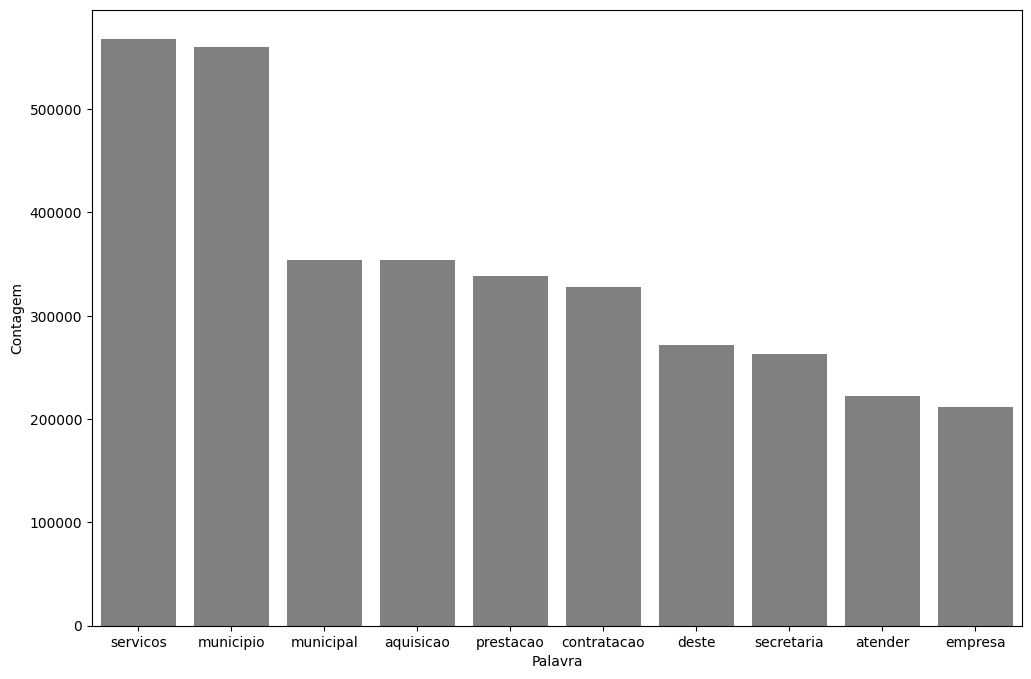

In [104]:
pareto(licitacoes, "tratamento_4", 10)

In [50]:
def gerando_bag_of_words_vetorizer(dataset,nome_coluna):
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=50, min_df=2, stop_words='english', use_idf=True)
    bag_of_words = vectorizer.fit_transform(dataset.DsObjetoLicitacao)
  
    
    return vetorizar,bag_of_words

In [63]:
vetorizar,bag_of_words = gerando_bag_of_words_vetorizer(licitacoes,"DsObjetoLicitacao")



pd.DataFrame.sparse.from_spmatrix(
            bag_of_words,
            columns = vetorizar.get_feature_names_out()
       
    )

,01,AO,AQUISIÇÃO,AS,ATENDER,Aquisição,BA,COM,CONTRATAÇÃO,Contratação,...,deste,do,dos,em,empresa,município,na,no,para,serviços
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1515578,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1515579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1515580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
print(vetorizar.shape)

(1515582, 50)


In [67]:

random_state =42
for num_cluster in range(2,30):
    kmeans = KMeans(n_clusters=num_cluster, init='k-means++', max_iter=100, n_init=1)
    kmeans.fit(bag_of_words)

kmeans.predict(bag_of_words)

array([ 1, 22,  8, ...,  1, 15,  3])

In [68]:
# Exibir os centros dos clusters e as palavras mais importantes em cada cluster
print("Top terms per cluster:")
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]


Top terms per cluster:


In [70]:
vetorizer

<1515582x50 sparse matrix of type '<class 'numpy.int64'>'
	with 9079959 stored elements in Compressed Sparse Row format>

In [72]:
terms = vetorizar.get_feature_names_out()
num_clusters = 10
for i in range(num_clusters):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print()

# Atribuir rótulos aos clusters
labels = kmeans.labels_

Cluster 0:
 NA
 Município
 DE
 SE
 COM
 serviços
 Aquisição
 SAÚDE
 QUE
 AO

Cluster 1:
 AO
 Municipal
 01
 SE
 deste
 EMPRESA
 QUE
 de
 para
 serviços

Cluster 2:
 na
 DE
 da
 SE
 QUE
 CONTRATAÇÃO
 MUNICIPAL
 em
 SAÚDE
 DAS

Cluster 3:
 DE
 QUE
 no
 SE
 EMPRESA
 AS
 BA
 em
 DESTE
 SAÚDE

Cluster 4:
 AS
 DE
 QUE
 SAÚDE
 em
 AO
 EM
 SE
 EMPRESA
 DESTE

Cluster 5:
 MUNICIPIO
 DAS
 Municipal
 DE
 no
 SAÚDE
 da
 QUE
 Aquisição
 MUNICIPAL

Cluster 6:
 MUNICÍPIO
 MUNICIPIO
 DAS
 da
 no
 SE
 MUNICIPAL
 DE
 SAÚDE
 EMPRESA

Cluster 7:
 CONTRATAÇÃO
 DE
 no
 AS
 SE
 ATENDER
 QUE
 EMPRESA
 DAS
 MUNICIPAL

Cluster 8:
 MUNICIPAL
 CONTRATAÇÃO
 DE
 no
 AS
 SE
 QUE
 AO
 SAÚDE
 EMPRESA

Cluster 9:
 SAÚDE
 DOS
 SE
 empresa
 no
 da
 DE
 AS
 MUNICIPAL
 CONTRATAÇÃO

